## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x=np.array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [5]:
x.shape

(50,)

In [3]:
a = -2
b = 1
y = a*x+b
y

array([  1.        ,   0.18367346,  -0.63265306,  -1.4489796 ,
        -2.26530612,  -3.08163266,  -3.89795918,  -4.71428572,
        -5.53061224,  -6.34693878,  -7.1632653 ,  -7.97959184,
        -8.79591836,  -9.6122449 , -10.42857142, -11.24489796,
       -12.06122448, -12.87755102, -13.69387756, -14.51020408,
       -15.32653062, -16.14285714, -16.95918368, -17.7755102 ,
       -18.59183674, -19.40816326, -20.2244898 , -21.04081632,
       -21.85714286, -22.67346938, -23.48979592, -24.30612244,
       -25.12244898, -25.93877552, -26.75510204, -27.57142858,
       -28.3877551 , -29.20408164, -30.02040816, -30.8367347 ,
       -31.65306122, -32.46938776, -33.28571428, -34.10204082,
       -34.91836734, -35.73469388, -36.5510204 , -37.36734694,
       -38.18367346, -39.        ])

### Plot X vs. y

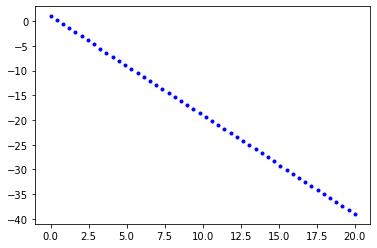

In [9]:
plt.plot(x,y,'.b')

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [508]:
m=len(y)
def GD (x,y,lr,it):
    theta_0s=[0]
    theta_1s=[0]
    costs=[]
    gradient_vecs=[]
    errs=[]
    h_yhat=[]
    
    for i in range (it):
        print(f'****************** Iteration {i} ********************\n')
    


        h_yhat.append(theta_0s[i] + theta_1s[i]*x)
        print (f'h(x):{h_yhat[i]}')

        errs.append( h_yhat[i]-y)
        print(f'Error Vector:{errs[i]}\n') 

        costs.append(errs[i]@errs[i]/(m*2)) # j or loss
        print(f'j(mse):{costs[i]}\n')

        theta_0drv = (errs[i].sum())/m #j/theta0
        theta_1drv= ((errs[i]*x).sum())/m # j/th1
        gradient_vec = np.array([[theta_0drv],[theta_1drv]])
        gradient_vecs.append(gradient_vec)
        print(f'Gradient Vector:{gradient_vec}\n')

        gradient_vector_norm=np.linalg.norm(gradient_vec,2)
        print(f'Gradient Vector Norm:{gradient_vector_norm}\n') 

        if (gradient_vector_norm<.001  ):
            break


        if i!=0 and abs(costs[i]-costs[i-1])< 0.001 :
                break
        
            
        theta_0s.append( theta_0s[i] - (lr*theta_0drv ))
        theta_1s.append( theta_1s[i] -( lr*theta_1drv ))
        print(f'theta_0_new :{theta_0s[i+1]}, theta_1_new :{theta_1s[i+1]}')
            
            
    print(f'\n\nGradient Descent converged after {i+1} epochs\n')
    print ((f'theta_0_Opt :{theta_0s[-1]} \ntheta_1_Opt:{theta_1s[-1]}\n'))
    print(f'Error Vector:{errs[-1]}\n')
    print(f'Cost :{costs[-1]}\n')
    print(f'h(x) = y_predict:{h_yhat[-1]}')
    print(f'y_actual:{y}')
    
    return theta_0s,theta_1s ,costs,errs,h_yhat,i



In [509]:
a = GD(x,y,0.0005,300)


****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector:[-1.         -0.18367346  0.63265306  1.4489796   2.26530612  3.08163266
  3.89795918  4.71428572  5.53061224  6.34693878  7.1632653   7.97959184
  8.79591836  9.6122449  10.42857142 11.24489796 12.06122448 12.87755102
 13.69387756 14.51020408 15.32653062 16.14285714 16.95918368 17.7755102
 18.59183674 19.40816326 20.2244898  21.04081632 21.85714286 22.67346938
 23.48979592 24.30612244 25.12244898 25.93877552 26.75510204 27.57142858
 28.3877551  29.20408164 30.02040816 30.8367347  31.65306122 32.46938776
 33.28571428 34.10204082 34.91836734 35.73469388 36.5510204  37.36734694
 38.18367346 39.        ]

j(mse):249.88775509289792

Gradient Vector:[[ 19.        ]
 [259.38775509]]

Gradient Vector Norm:260.0826935652066

theta_0_new :-0.009500000000000001, theta_1_new 

#### Calculate r2 score

In [309]:
from sklearn.metrics import r2_score
r2_score(y,a[-2][-1])

0.9975395965148716

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

Text(0, 0.5, 'loss')

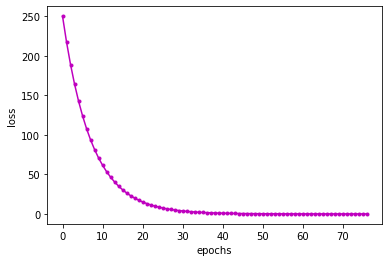

In [193]:
plt.plot(a[2],'.m-')
plt.xlabel('epochs')
plt.ylabel('loss')

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

Text(0, 0.5, 'loss')

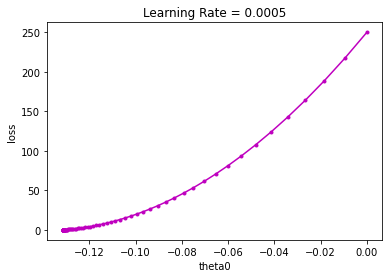

In [194]:
plt.plot(a[0],a[2],'.m-')
plt.title('Learning Rate = 0.0005')
plt.xlabel('theta0')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

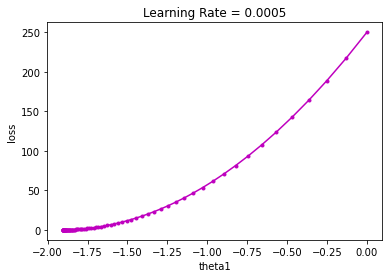

In [195]:
plt.plot(a[1],a[2],'.m-')
plt.title('Learning Rate = 0.0005')
plt.xlabel('theta1')
plt.ylabel('loss')

#### Plot all regression lines till converge

Text(0, 0.5, 'y')

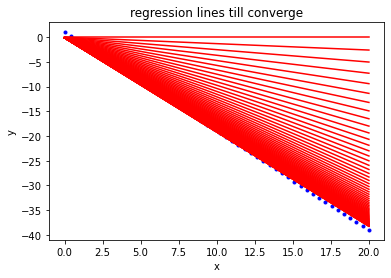

In [82]:
plt.plot(x,y,'.b')
for i in range( len(a[4])):
    plt.plot(x,a[4][i],'r')
plt.title('regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')

#### Plot the best regression line

Text(0, 0.5, 'y')

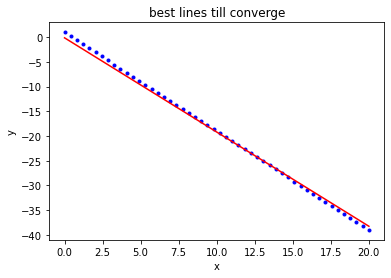

In [83]:
plt.plot(x,y,'.b')
plt.plot(x,a[4][-1],'r')
plt.title('best lines till converge')
plt.xlabel('x')
plt.ylabel('y')

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [310]:
b = GD(x,y,0.00005,1000)


****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector:[-1.         -0.18367346  0.63265306  1.4489796   2.26530612  3.08163266
  3.89795918  4.71428572  5.53061224  6.34693878  7.1632653   7.97959184
  8.79591836  9.6122449  10.42857142 11.24489796 12.06122448 12.87755102
 13.69387756 14.51020408 15.32653062 16.14285714 16.95918368 17.7755102
 18.59183674 19.40816326 20.2244898  21.04081632 21.85714286 22.67346938
 23.48979592 24.30612244 25.12244898 25.93877552 26.75510204 27.57142858
 28.3877551  29.20408164 30.02040816 30.8367347  31.65306122 32.46938776
 33.28571428 34.10204082 34.91836734 35.73469388 36.5510204  37.36734694
 38.18367346 39.        ]

j(mse):249.88775509289792

Gradient Vector:[[ 19.        ]
 [259.38775509]]

Gradient Vector Norm:260.0826935652066

theta_0_new :-0.0009500000000000002, theta_1_new

Gradient Vector:[[  8.72099711]
 [121.19351658]]

Gradient Vector Norm:121.50688972646674

theta_0_new :-0.07469615481575181, theta_1_new :-1.02653395402074
****************** Iteration 113 ********************

h(x):[ -0.07469615  -0.49368961  -0.91268306  -1.33167651  -1.75066996
  -2.16966341  -2.58865686  -3.00765031  -3.42664376  -3.84563721
  -4.26463066  -4.68362411  -5.10261756  -5.52161101  -5.94060446
  -6.35959791  -6.77859136  -7.19758482  -7.61657827  -8.03557172
  -8.45456517  -8.87355862  -9.29255207  -9.71154552 -10.13053897
 -10.54953242 -10.96852587 -11.38751932 -11.80651277 -12.22550622
 -12.64449967 -13.06349312 -13.48248657 -13.90148003 -14.32047348
 -14.73946693 -15.15846038 -15.57745383 -15.99644728 -16.41544073
 -16.83443418 -17.25342763 -17.67242108 -18.09141453 -18.51040798
 -18.92940143 -19.34839488 -19.76738833 -20.18638178 -20.60537524]
Error Vector:[-1.07469615 -0.67736307 -0.28003     0.11730309  0.51463616  0.91196925
  1.30930232  1.70663541  2.10396848


Gradient Vector:[[ 4.33922079]
 [62.28096085]]

Gradient Vector Norm:62.43193830920424

theta_0_new :-0.10540143409484125, theta_1_new :-1.4586735217688143
****************** Iteration 211 ********************

h(x):[ -0.10540143  -0.70077839  -1.29615533  -1.89153228  -2.48690922
  -3.08228618  -3.67766312  -4.27304007  -4.86841701  -5.46379397
  -6.05917091  -6.65454786  -7.2499248   -7.84530176  -8.4406787
  -9.03605565  -9.63143259 -10.22680954 -10.8221865  -11.41756344
 -12.01294039 -12.60831733 -13.20369429 -13.79907123 -14.39444818
 -14.98982512 -15.58520208 -16.18057902 -16.77595597 -17.37133291
 -17.96670987 -18.56208681 -19.15746376 -19.75284071 -20.34821765
 -20.94359461 -21.53897155 -22.1343485  -22.72972544 -23.3251024
 -23.92047934 -24.51585629 -25.11123323 -25.70661019 -26.30198713
 -26.89736408 -27.49274102 -28.08811798 -28.68349491 -29.27887187]
Error Vector:[-1.10540143e+00 -8.84451849e-01 -6.63502269e-01 -4.42552683e-01
 -2.21603103e-01 -6.53517459e-04  2.20296063e-

 -29.9770769  -30.64063761 -31.30419833 -31.96775904 -32.63131977]
Error Vector:[-1.11684455 -0.96407874 -0.81131293 -0.65854712 -0.50578131 -0.35301549
 -0.20024968 -0.04748387  0.10528194  0.25804776  0.41081357  0.56357938
  0.71634519  0.869111    1.02187681  1.17464263  1.32740844  1.48017425
  1.63294006  1.78570587  1.93847169  2.0912375   2.24400331  2.39676912
  2.54953493  2.70230074  2.85506656  3.00783237  3.16059818  3.31336399
  3.4661298   3.61889561  3.77166143  3.92442724  4.07719305  4.22995887
  4.38272468  4.53549049  4.6882563   4.84102211  4.99378792  5.14655374
  5.29931955  5.45208536  5.60485117  5.75761698  5.91038279  6.06314861
  6.21591442  6.36868023]

j(mse):5.877728324848179

Gradient Vector:[[ 2.62591784]
 [39.2442724 ]]

Gradient Vector Norm:39.33202716424635

theta_0_new :-0.1169758488790733, theta_1_new :-1.6276859744172434
****************** Iteration 279 ********************

h(x):[ -0.11697585  -0.78133748  -1.44569909  -2.11006072  -2.77442234
  


j(mse):2.092042255015421

Gradient Vector:[[ 1.4027741 ]
 [22.79657015]]

Gradient Vector Norm:22.839688828028727

theta_0_new :-0.12478208793557112, theta_1_new :-1.748391223581749
****************** Iteration 359 ********************

h(x):[ -0.12478209  -0.83841117  -1.55204023  -2.26566931  -2.97929837
  -3.69292745  -4.40655651  -5.12018559  -5.83381465  -6.54744373
  -7.26107279  -7.97470187  -8.68833093  -9.40196001 -10.11558907
 -10.82921815 -11.54284721 -12.25647629 -12.97010537 -13.68373443
 -14.39736351 -15.11099257 -15.82462165 -16.53825071 -17.25187979
 -17.96550885 -18.67913793 -19.392767   -20.10639607 -20.82002514
 -21.53365421 -22.24728328 -22.96091236 -23.67454143 -24.3881705
 -25.10179958 -25.81542864 -26.52905772 -27.24268678 -27.95631586
 -28.66994492 -29.383574   -30.09720306 -30.81083214 -31.5244612
 -32.23809028 -32.95171934 -33.66534842 -34.37897748 -35.09260656]
Error Vector:[-1.12478209 -1.02208463 -0.91938717 -0.81668971 -0.71399225 -0.61129479
 -0.50859733

****************** Iteration 398 ********************

h(x):[ -0.12710632  -0.85662254  -1.58613875  -2.31565498  -3.04517118
  -3.77468741  -4.50420362  -5.23371984  -5.96323605  -6.69275228
  -7.42226849  -8.15178471  -8.88130092  -9.61081715 -10.34033336
 -11.06984958 -11.79936579 -12.52888202 -13.25839824 -13.98791445
 -14.71743068 -15.44694688 -16.17646311 -16.90597932 -17.63549554
 -18.36501175 -19.09452798 -19.82404419 -20.55356041 -21.28307662
 -22.01259285 -22.74210906 -23.47162528 -24.20114151 -24.93065772
 -25.66017394 -26.38969015 -27.11920638 -27.84872258 -28.57823881
 -29.30775502 -30.03727124 -30.76678745 -31.49630368 -32.22581989
 -32.95533611 -33.68485232 -34.41436855 -35.14388476 -35.87340098]
Error Vector:[-1.12710632e+00 -1.04029600e+00 -9.53485690e-01 -8.66675376e-01
 -7.79865064e-01 -6.93054750e-01 -6.06244438e-01 -5.19434124e-01
 -4.32623813e-01 -3.45813499e-01 -2.59003187e-01 -1.72192873e-01
 -8.53825612e-02  1.42775275e-03  8.82380645e-02  1.75048378e-01
  2.61


j(mse):0.8517050635043591

Gradient Vector:[[ 0.71975893]
 [13.61043875]]

Gradient Vector Norm:13.629456914163752

theta_0_new :-0.12868659773343274, theta_1_new :-1.8158395677880599
****************** Iteration 435 ********************

h(x):[ -0.1286866   -0.86984561  -1.61100461  -2.35216363  -3.09332262
  -3.83448164  -4.57564064  -5.31679965  -6.05795865  -6.79911767
  -7.54027666  -8.28143568  -9.02259468  -9.76375369 -10.50491269
 -11.24607171 -11.98723071 -12.72838972 -13.46954874 -14.21070773
 -14.95186675 -15.69302575 -16.43418476 -17.17534376 -17.91650278
 -18.65766177 -19.39882079 -20.13997979 -20.8811388  -21.6222978
 -22.36345682 -23.10461581 -23.84577483 -24.58693385 -25.32809284
 -26.06925186 -26.81041086 -27.55156987 -28.29272887 -29.03388789
 -29.77504688 -30.5162059  -31.2573649  -31.99852391 -32.73968291
 -33.48084193 -34.22200092 -34.96315994 -35.70431894 -36.44547795]
Error Vector:[-1.12868660e+00 -1.05351907e+00 -9.78351551e-01 -9.03184027e-01
 -8.28016505e-01 


j(mse):0.40993842250651197

Gradient Vector:[[0.31234759]
 [8.12946603]]

Gradient Vector Norm:8.135464275174211

theta_0_new :-0.13057105023273835, theta_1_new :-1.8561161706255822
****************** Iteration 511 ********************

h(x):[ -0.13057105  -0.8881695   -1.64576792  -2.40336637  -3.1609648
  -3.91856324  -4.67616167  -5.43376011  -6.19135854  -6.94895699
  -7.70655541  -8.46415386  -9.22175229  -9.97935073 -10.73694916
 -11.49454761 -12.25214603 -13.00974448 -13.76734292 -14.52494135
 -15.2825398  -16.04013822 -16.79773667 -17.5553351  -18.31293354
 -19.07053197 -19.82813042 -20.58572884 -21.34332729 -22.10092572
 -22.85852416 -23.61612259 -24.37372103 -25.13131948 -25.88891791
 -26.64651635 -27.40411478 -28.16171323 -28.91931165 -29.6769101
 -30.43450853 -31.19210697 -31.9497054  -32.70730384 -33.46490227
 -34.22250072 -34.98009914 -35.73769759 -36.49529602 -37.25289446]
Error Vector:[-1.13057105 -1.07184296 -1.01311486 -0.95438677 -0.89565868 -0.83693058
 -0.77820249

 -34.68706004 -35.45496656 -36.2228731  -36.99077962 -37.75868616]
Error Vector:[-1.13126619 -1.08284619 -1.03442619 -0.98600619 -0.93758619 -0.88916619
 -0.84074619 -0.79232619 -0.74390619 -0.69548618 -0.64706618 -0.59864618
 -0.55022618 -0.50180618 -0.45338618 -0.40496618 -0.35654618 -0.30812618
 -0.25970618 -0.21128618 -0.16286618 -0.11444618 -0.06602618 -0.01760618
  0.03081383  0.07923383  0.12765383  0.17607383  0.22449383  0.27291383
  0.32133383  0.36975383  0.41817383  0.46659383  0.51501383  0.56343383
  0.61185383  0.66027384  0.70869384  0.75711384  0.80553384  0.85395384
  0.90237384  0.95079384  0.99921384  1.04763384  1.09605384  1.14447384
  1.19289384  1.24131384]

j(mse):0.24563450557650146

Gradient Vector:[[0.05502383]
 [4.66593832]]

Gradient Vector Norm:4.666262748000841

theta_0_new :-0.1312689427818459, theta_1_new :-1.8816042951558867
****************** Iteration 593 ********************

h(x):[ -0.13126894  -0.8992707   -1.66727245  -2.43527421  -3.20327595
  

In [94]:
r2_score(y,b[-2][-1])

0.9965793400856563

Text(0, 0.5, 'loss')

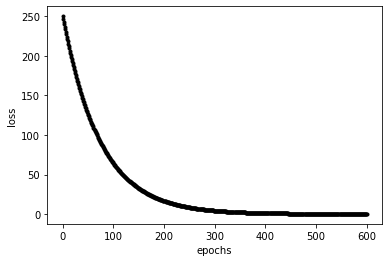

In [199]:
plt.plot(b[2],'.k')
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

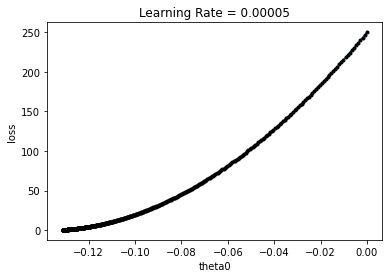

In [200]:
plt.plot(b[0],b[2],b[0],b[2],'.k')
plt.title('Learning Rate = 0.00005')
plt.xlabel('theta0')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

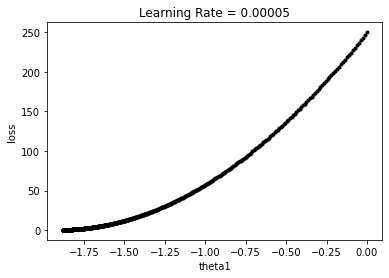

In [201]:
plt.plot(b[1],b[2],'.k')
plt.title('Learning Rate = 0.00005')
plt.xlabel('theta1')
plt.ylabel('loss')

In [168]:
from matplotlib.pyplot import figure



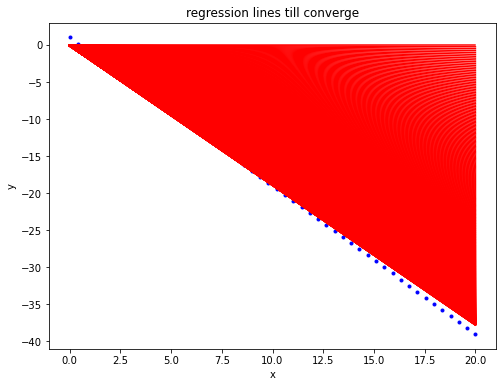

In [108]:
figure(figsize=(8, 6))
plt.plot(x,y,'.b')
for i in range( len(b[4])):
    plt.plot(x,b[4][i],'r')
plt.title('regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

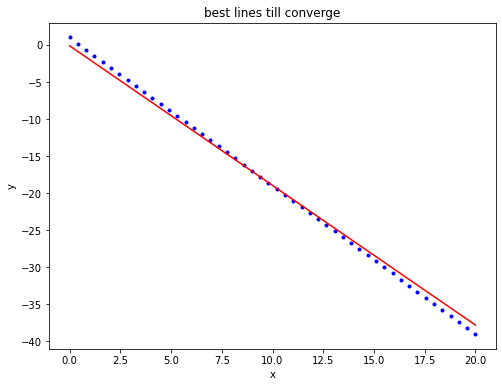

In [110]:
figure(figsize=(8, 6))
plt.plot(x,y,'.b')
plt.plot(x,b[4][-1],'r')
plt.title('best lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [311]:
c = GD(x,y,0.005,300)

****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector:[-1.         -0.18367346  0.63265306  1.4489796   2.26530612  3.08163266
  3.89795918  4.71428572  5.53061224  6.34693878  7.1632653   7.97959184
  8.79591836  9.6122449  10.42857142 11.24489796 12.06122448 12.87755102
 13.69387756 14.51020408 15.32653062 16.14285714 16.95918368 17.7755102
 18.59183674 19.40816326 20.2244898  21.04081632 21.85714286 22.67346938
 23.48979592 24.30612244 25.12244898 25.93877552 26.75510204 27.57142858
 28.3877551  29.20408164 30.02040816 30.8367347  31.65306122 32.46938776
 33.28571428 34.10204082 34.91836734 35.73469388 36.5510204  37.36734694
 38.18367346 39.        ]

j(mse):249.88775509289792

Gradient Vector:[[ 19.        ]
 [259.38775509]]

Gradient Vector Norm:260.0826935652066

theta_0_new :-0.09500000000000001, theta_1_new :

In [116]:
r2_score(y,c[-2][-1])

0.9976200723229439

Text(0, 0.5, 'loss')

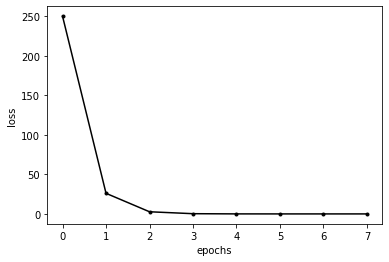

In [204]:
plt.plot(c[2],'.k-')
plt.xlabel('epochs')
plt.ylabel('loss')

(8, 8)

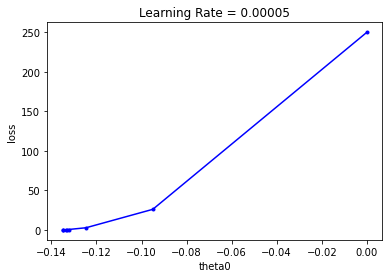

In [206]:
plt.plot(c[0],c[2],'.b-')
plt.title('Learning Rate = 0.00005')
plt.xlabel('theta0')
plt.ylabel('loss')
len(c[0]),len(c[2])

Text(0, 0.5, 'loss')

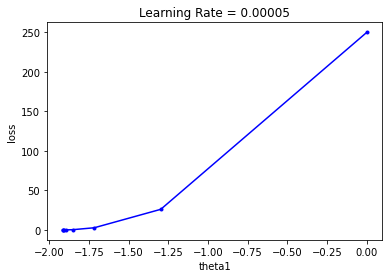

In [208]:
plt.plot(c[1],c[2],'.b-')
plt.title('Learning Rate = 0.00005')
plt.xlabel('theta1')
plt.ylabel('loss')

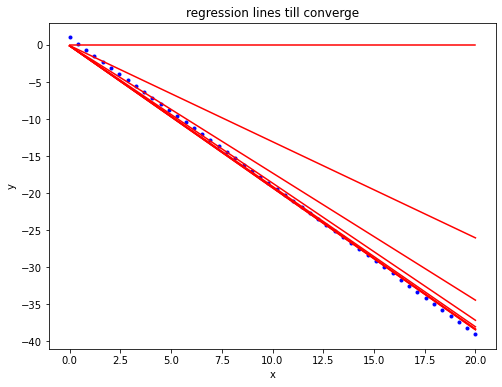

In [124]:
figure(figsize=(8, 6))
plt.plot(x,y,'.b')
for i in range( len(c[4])):
    plt.plot(x,c[4][i],'r')
plt.title('regression lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

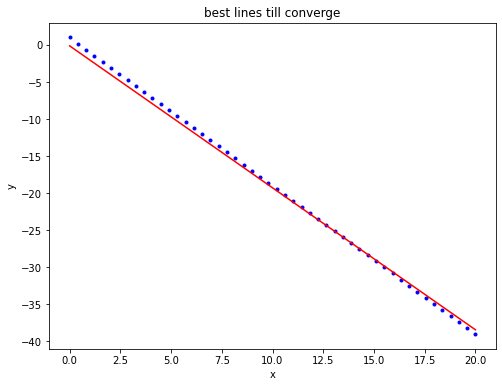

In [125]:
figure(figsize=(8, 6))
plt.plot(x,y,'.b')
plt.plot(x,c[4][-1],'r')
plt.title('best lines till converge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [8]:
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [392]:
from sklearn.utils import shuffle
xn,yn = shuffle(x,y)
xn,yn,x,y

(array([17.55102041, 10.20408163, 13.06122449, 15.51020408, 17.95918367,
        19.18367347,  2.44897959,  0.40816327, 16.73469388,  3.26530612,
         4.89795918,  4.08163265, 14.28571429,  6.93877551,  9.79591837,
         4.48979592, 18.36734694,  1.2244898 , 20.        ,  5.71428571,
         7.75510204,  8.97959184,  0.81632653,  2.04081633,  6.53061224,
         8.16326531,  7.34693878,  9.3877551 , 11.42857143,  1.63265306,
         2.85714286, 13.46938776,  0.        , 12.65306122, 12.24489796,
         8.57142857,  3.67346939, 16.32653061, 15.10204082,  6.12244898,
        10.6122449 ,  5.30612245, 11.83673469, 11.02040816, 13.87755102,
        19.59183673, 17.14285714, 14.69387755, 15.91836735, 18.7755102 ]),
 array([-34.10204082, -19.40816326, -25.12244898, -30.02040816,
        -34.91836734, -37.36734694,  -3.89795918,   0.18367346,
        -32.46938776,  -5.53061224,  -8.79591836,  -7.1632653 ,
        -27.57142858, -12.87755102, -18.59183674,  -7.97959184,
        -35.

In [9]:
len(xn),len(yn)

(50, 50)

In [393]:
m=len(yn)
def SGD (x,y,lr,it):
    theta_0sd=[0.0]
    theta_1sd=[0.0]
    costsd=[]
    gradient_vecsd=[]
    gradient_vector_normd=[]
    
    for j in range (it):
        print(f'****************** Epoch {j} ********************\n')
            
        for i in range(len(xn)) :

            h_yhatd=theta_0sd[(j*m)+i] + (theta_1sd[(j*m)+i]*xn[i])

            errsd=(h_yhatd-yn[i])

            cost = (errsd)**2/2

            costsd.append(cost)
            

            grad_th0=(h_yhatd-yn[i])
            grad_th1=(h_yhatd-yn[i])*xn[i]
            
            theta_0sd.append( theta_0sd[(j*m)+i] - (lr*grad_th0 ))
            theta_1sd.append( theta_1sd[(j*m)+i] -( lr*grad_th1 ))
            
            gradient_vec = np.array([[grad_th0],[grad_th1]])
            gradient_vector_norm=np.linalg.norm(gradient_vec)

        print(f'cost:{costsd[-1]}\n')
        print(f'Gradient Vector:{gradient_vec}\n')
        print(f'Gradient Vector Norm:{gradient_vector_norm}\n')



        
        if (gradient_vector_norm <.001  ):
            break

        if j!=0 and abs(costsd[(m*(j+1)-1)]-costsd[(j*m)-1])< 0.001 :
            
            break
        

        print(f'theta_0_new :{theta_0sd[-1]}, theta_1_new :{theta_1sd[-1]}')
            
            
    print(f'\n\nGradient Descent converged after {j+1} epochs\n')
    print (f'theta_0_Opt :{theta_0sd[-1]} \ntheta_1_Opt:{theta_1sd[-1]}\n')
    print(f'Cost :{costsd[-1]}\n')
 #   print(f'y_actual:{yn}')
    
    return theta_0sd,theta_1sd ,costsd


##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [394]:
d = SGD(xn,yn,0.0005,300)

****************** Epoch 0 ********************

cost:1.241745046399503

Gradient Vector:[[ 1.57590929]
 [29.58850096]]

Gradient Vector Norm:29.63043839298116

theta_0_new :-0.12560791170736277, theta_1_new :-1.8709510622496592
****************** Epoch 1 ********************

cost:0.08943496091514612

Gradient Vector:[[0.42293016]
 [7.94072957]]

Gradient Vector Norm:7.951984406361794

theta_0_new :-0.12201497403367473, theta_1_new :-1.9216965062108986
****************** Epoch 2 ********************

cost:0.07587029029957536

Gradient Vector:[[0.38953893]
 [7.31379222]]

Gradient Vector Norm:7.324158461333416

theta_0_new :-0.11499491446611566, theta_1_new :-1.9235344886567503
****************** Epoch 3 ********************

cost:0.07459204925897413

Gradient Vector:[[0.38624357]
 [7.25192016]]

Gradient Vector Norm:7.26219871495133

theta_0_new :-0.10792668244868606, theta_1_new :-1.92405543875823
****************** Epoch 4 ********************

cost:0.07364048356852076

Gradient Vec

In [395]:
r2_score(yn,(-0.100900783582806  +(-1.924538012980704*xn)))

0.9977123113819071

Text(0, 0.5, 'loss')

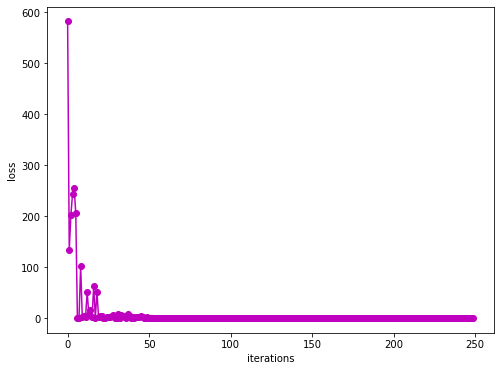

In [396]:

figure(figsize=(8, 6))
plt.plot(d[-1],'-mo')
plt.xlabel('iterations')
plt.ylabel('loss')


Text(0, 0.5, 'loss')

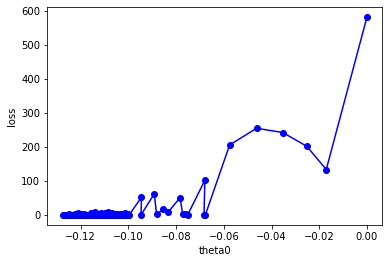

In [397]:
plt.plot(d[0][:-1],d[-1],'-bo')
plt.xlabel('theta0')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

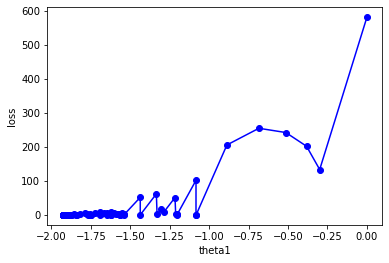

In [398]:
plt.plot(d[1][:-1],d[-1],'-bo')
plt.xlabel('theta1')
plt.ylabel('loss')

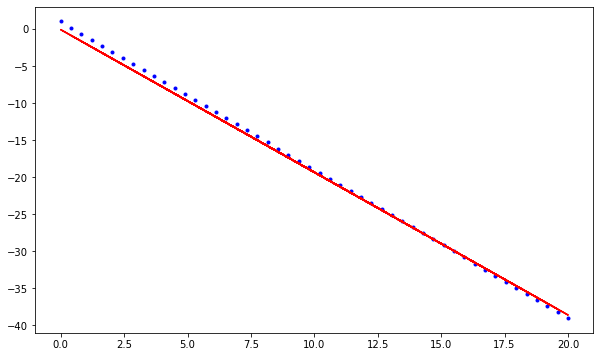

In [400]:
figure(figsize=(10, 6))
plt.plot(xn,yn,'.b',xn,(-0.100900783582806  +(-1.924538012980704*xn)),'r-')
# plt.plot(x,y,'.b')
# plt.plot(x,c[4][-1],'r')

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [404]:
e = SGD(xn,yn,0.0001,300)

****************** Epoch 0 ********************

cost:186.50451322327666

Gradient Vector:[[ 19.3134416 ]
 [362.61971976]]

Gradient Vector Norm:363.1336808769639

theta_0_new :-0.06916491031813166, theta_1_new :-0.9507694900507752
****************** Epoch 1 ********************

cost:49.54954737932379

Gradient Vector:[[  9.95485282]
 [186.90744075]]

Gradient Vector Norm:187.17235506708894

theta_0_new :-0.1032820939278123, theta_1_new :-1.4297778828303123
****************** Epoch 2 ********************

cost:13.729468233977911

Gradient Vector:[[ 5.24012752]
 [98.38606778]]

Gradient Vector Norm:98.52551582704244

theta_0_new :-0.11974473909242453, theta_1_new :-1.671134189021981
****************** Epoch 3 ********************

cost:4.10345960022673

Gradient Vector:[[ 2.8647721 ]
 [53.78755784]]

Gradient Vector Norm:53.86379393489846

theta_0_new :-0.12731475041100465, theta_1_new :-1.7927719965856321
****************** Epoch 4 ********************

cost:1.3909224504243554

Gradie

In [405]:
r2_score(yn,(-0.12054847281057529 +(-1.9172511702085475*xn)))



0.9976692858743966

Text(0, 0.5, 'loss')

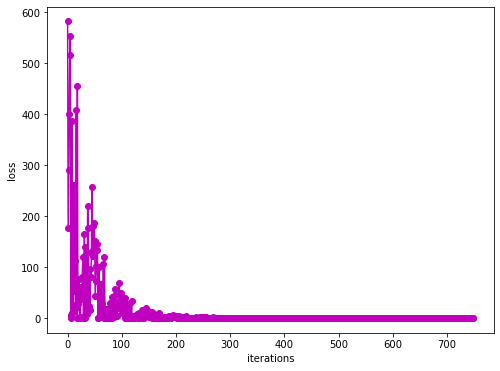

In [406]:
figure(figsize=(8, 6))
plt.plot(e[-1],'-mo')
plt.xlabel('iterations')
plt.ylabel('loss')



Text(0, 0.5, 'loss')

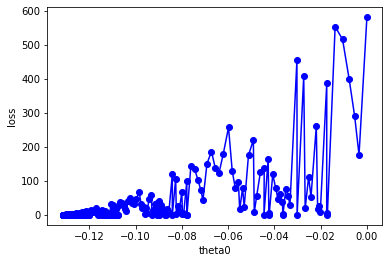

In [408]:
plt.plot(e[0][:-1],e[-1],'-bo')
plt.xlabel('theta0')
plt.ylabel('loss')



Text(0, 0.5, 'loss')

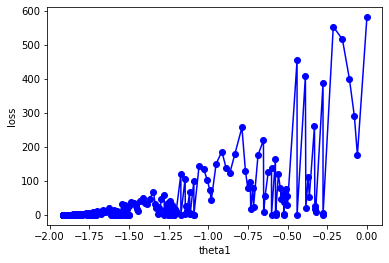

In [409]:
plt.plot(e[1][:-1],e[-1],'-bo')
plt.xlabel('theta1')
plt.ylabel('loss')



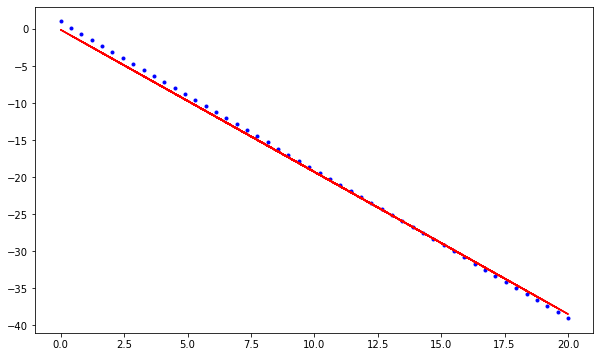

In [410]:
figure(figsize=(10, 6))
plt.plot(xn,yn,'.b',xn,(-0.12054847281057529 +(-1.9172511702085475*xn)),'r-')

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [411]:
f = SGD(xn,yn,0.00007,300)

****************** Epoch 0 ********************

cost:273.9383158017128

Gradient Vector:[[ 23.40676465]
 [439.47394852]]

Gradient Vector Norm:440.0968394152669

theta_0_new :-0.05311176475643226, theta_1_new :-0.7280961550769518
****************** Epoch 1 ********************

cost:107.79871289611796

Gradient Vector:[[ 14.68323622]
 [275.68525135]]

Gradient Vector Norm:276.0759954065306

theta_0_new :-0.08564818935375375, theta_1_new :-1.1794882148131498
****************** Epoch 2 ********************

cost:43.014373775744616

Gradient Vector:[[  9.27516833]
 [174.14601759]]

Gradient Vector Norm:174.39284443295878

theta_0_new :-0.10542984369194594, theta_1_new :-1.4593451160154511
****************** Epoch 3 ********************

cost:17.537586384820383

Gradient Vector:[[  5.92242963]
 [111.196638  ]]

Gradient Vector Norm:111.35424318674107

theta_0_new :-0.11730487578053825, theta_1_new :-1.6328634634422865
****************** Epoch 4 ********************

cost:7.387538253053322

In [412]:
r2_score(yn,(-0.1220954080522266  +(-1.9168229398925345*xn)))


0.9976630211996865

Text(0, 0.5, 'loss')

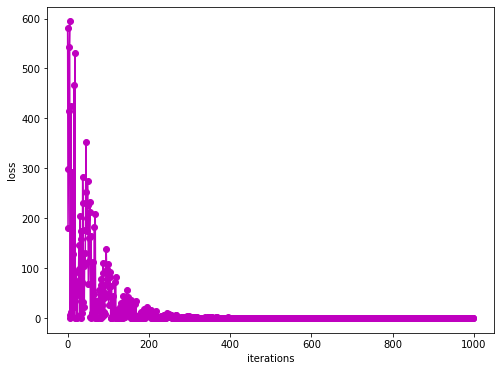

In [413]:
figure(figsize=(8, 6))
plt.plot(f[-1],'-mo')
plt.xlabel('iterations')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

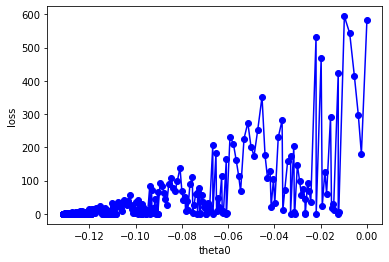

In [414]:
plt.plot(f[0][:-1],f[-1],'-bo')
plt.xlabel('theta0')
plt.ylabel('loss')


Text(0, 0.5, 'loss')

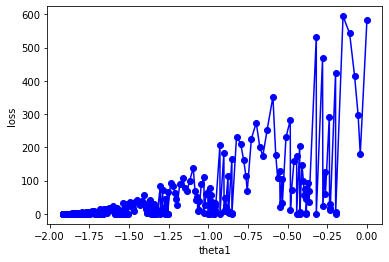

In [415]:
plt.plot(f[1][:-1],f[-1],'-bo')
plt.xlabel('theta1')
plt.ylabel('loss')

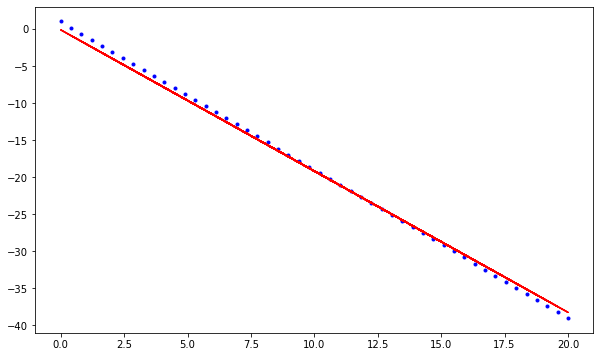

In [289]:
figure(figsize=(10, 6))
plt.plot(xn,yn,'.b',xn,(-0.1291552690553122 +(-1.9054576894993418*xn)),'r-')

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [29]:
m=len(yn)
def MB (x,y,lr,it,size):
    theta_0sd=[0.0]
    theta_1sd=[0.0]
    costsd=[]
    gradient_vecsd=[]
    gradient_vector_normd=[]
    
    for j in range (it):
        print(f'****************** Epoch {j} ********************\n')
        bat = (len(xn))//size    
        for i in range(bat) :

            h_yhatd=theta_0sd[(j*bat)+i] + (theta_1sd[(j*bat)+i]*xn[i*size:(i+1)*size])
            

            errsd=(h_yhatd-yn[i*size:(i+1)*size])

            cost = (errsd@errsd)/2*size
            costsd.append(cost)
            

            grad_th0=(errsd.sum())/size
            grad_th1=((errsd*xn[i*size:(i+1)*size]).sum())/size
            
            theta_0sd.append( theta_0sd[(j*bat)+i] - (lr*grad_th0 ))
            theta_1sd.append( theta_1sd[(j*bat)+i] -( lr*grad_th1 ))
            
            gradient_vec = np.array([[grad_th0],[grad_th1]])
            gradient_vector_norm=np.linalg.norm(gradient_vec)

        print(f'cost:{costsd[-1]}\n')
        print(f'Gradient Vector:{gradient_vec}\n')
        print(f'Gradient Vector Norm:{gradient_vector_norm}\n')
        
        if (gradient_vector_norm <.01  ):
            break
        
        if j!=0 and abs(costsd[((bat*(j+1))-1)]-costsd[(j*bat)-1])< 0.01:
                break
        

        print(f'theta_0_new :{theta_0sd[-1]}, theta_1_new :{theta_1sd[-1]}')
            
            
    print(f'\n\nGradient Descent converged after {j+1} epochs\n')
    print (f'theta_0_Opt :{theta_0sd[-1]} \ntheta_1_Opt:{theta_1sd[-1]}\n')
    print(f'Cost :{costsd[-1]}\n')
#    print(f'y_actual:{yn}')
    
    return theta_0sd,theta_1sd ,costsd

In [30]:
g = MB(xn,yn,.0005,300,5)

****************** Epoch 0 ********************

cost:4836.50092964252

Gradient Vector:[[ 19.55251199]
 [340.64195155]]

Gradient Vector Norm:341.20263756290046

theta_0_new :-0.07069048582968283, theta_1_new :-0.9735699276073442
****************** Epoch 1 ********************

cost:1216.956408739251

Gradient Vector:[[  9.80125713]
 [170.86290355]]

Gradient Vector Norm:171.14378882014142

theta_0_new :-0.10472045011762801, theta_1_new :-1.452549021940602
****************** Epoch 2 ********************

cost:318.10963121768185

Gradient Vector:[[ 5.00412648]
 [87.33994708]]

Gradient Vector Norm:87.48318488388499

theta_0_new :-0.12071710987618771, theta_1_new :-1.6882259750097544
****************** Epoch 3 ********************

cost:89.32006108208432

Gradient Vector:[[ 2.64405843]
 [46.24860674]]

Gradient Vector Norm:46.32412622292346

theta_0_new :-0.12784367549703243, theta_1_new :-1.8042162181320884
****************** Epoch 4 ********************

cost:28.412995188393396

Gradi

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

****************** Epoch 0 ********************

Cost = 4.756947839402018

Gradient Vector:
[[ 8.22967595]
 [96.72704965]]

Gradient Vector Norm:
97.07651466963269

theta_0_new : -0.06646182531835047
theta_1_new : -0.9256821913217486

****************** Epoch 1 ********************

Cost = 1.122060441600775

Gradient Vector:
[[ 3.83507638]
 [46.73760466]]

Gradient Vector Norm:
46.89468519790215

theta_0_new : -0.10259516119797818
theta_1_new : -1.4293728638220262

****************** Epoch 2 ********************

Cost = 0.2643644845972613

Gradient Vector:
[[ 1.67586431]
 [22.1741011 ]]

Gradient Vector Norm:
22.23733978351637

theta_0_new : -0.11960676915575022
theta_1_new : -1.6769384840774493

****************** Epoch 3 ********************

Cost = 0.06706361377523971

Gradient Vector:
[[ 0.61510837]
 [10.10475679]]

Gradient Vector Norm:
10.12346127220413

theta_0_new : -0.12722302765329713
theta_1_new : -1.7986456643566977

****************** Epoch 4 ********************

Cost = 0

In [15]:
r2_score(yn,(-0.11874390813887346 +(-1.9176743624041217*xn)))


0.9976764559952869

Text(0, 0.5, 'loss')

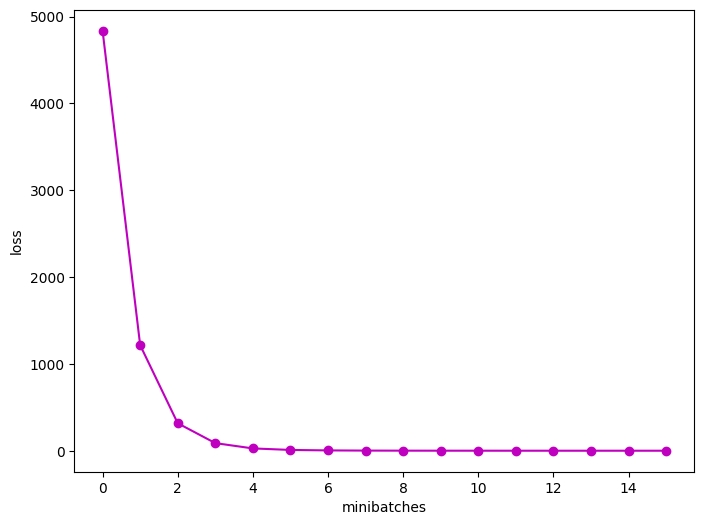

In [20]:
figure(figsize=(8, 6))
plt.plot(g[-1],'-mo')
plt.xlabel('minibatches')
plt.ylabel('loss')



Text(0, 0.5, 'loss')

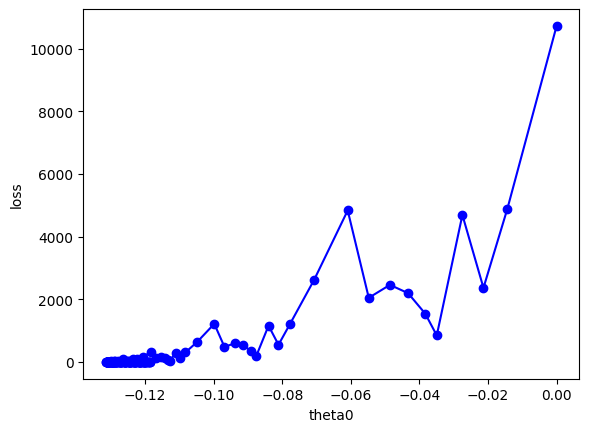

In [31]:
plt.plot(g[0][:-1],g[-1],'-bo')
plt.xlabel('theta0')
plt.ylabel('loss')


Text(0, 0.5, 'loss')

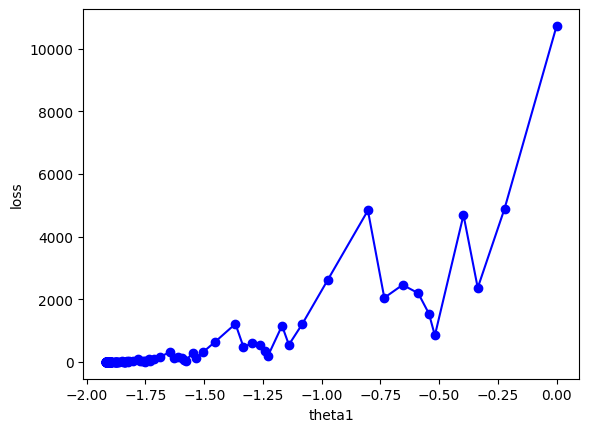

In [32]:

plt.plot(g[1][:-1],g[-1],'-bo')
plt.xlabel('theta1')
plt.ylabel('loss')


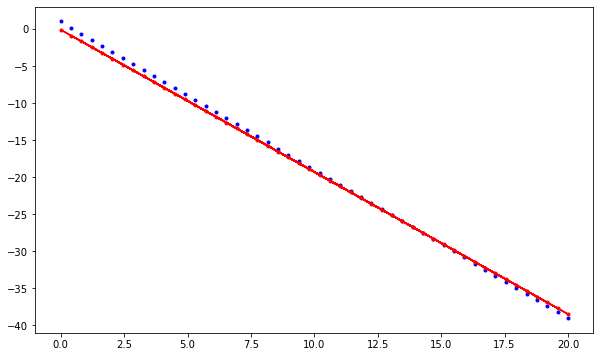

In [484]:
figure(figsize=(10, 6))
plt.plot(xn,yn,'.b',xn,(-0.11874390813887344+(-1.9176743624041217*xn)),'.r-')

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [494]:
k=MB(xn,yn,.0005,300,10)

****************** Epoch 0 ********************

cost:24251.032830263703

Gradient Vector:[[ 21.03334663]
 [318.69695307]]

Gradient Vector Norm:319.3902778210126

theta_0_new :-0.04147326965465136, theta_1_new :-0.5694207436886041
****************** Epoch 1 ********************

cost:12045.438263287477

Gradient Vector:[[ 14.79505229]
 [224.5848208 ]]

Gradient Vector Norm:225.07162260944983

theta_0_new :-0.07039990999987912, theta_1_new :-0.9695796473302503
****************** Epoch 2 ********************

cost:5998.267884546631

Gradient Vector:[[ 10.41127509]
 [158.45003398]]

Gradient Vector Norm:158.79171237286522

theta_0_new :-0.09050993525004213, theta_1_new :-1.2507950319303403
****************** Epoch 3 ********************

cost:2998.1302988286225

Gradient Vector:[[  7.3307023 ]
 [111.97545928]]

Gradient Vector Norm:112.21516241901433

theta_0_new :-0.10442449712381192, theta_1_new :-1.4484265370332265
****************** Epoch 4 ********************

cost:1506.81531624790

In [495]:
r2_score(yn,(-0.11803308501050189+-1.9170061612022904*xn))

0.9976799278614321

Text(0, 0.5, 'loss')

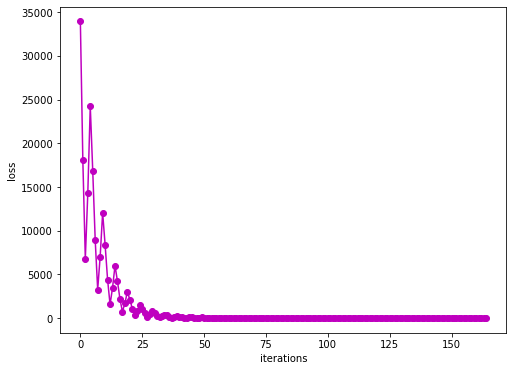

In [496]:
figure(figsize=(8, 6))
plt.plot(k[-1],'-mo')
plt.xlabel('iterations')
plt.ylabel('loss')



Text(0, 0.5, 'loss')

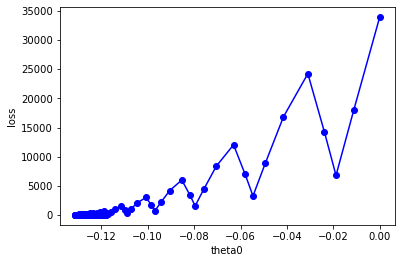

In [497]:

plt.plot(k[0][:-1],k[-1],'-bo')
plt.xlabel('theta0')
plt.ylabel('loss')



Text(0, 0.5, 'loss')

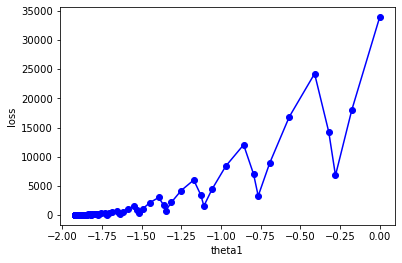

In [498]:

plt.plot(k[1][:-1],k[-1],'-bo')
plt.xlabel('theta1')
plt.ylabel('loss')



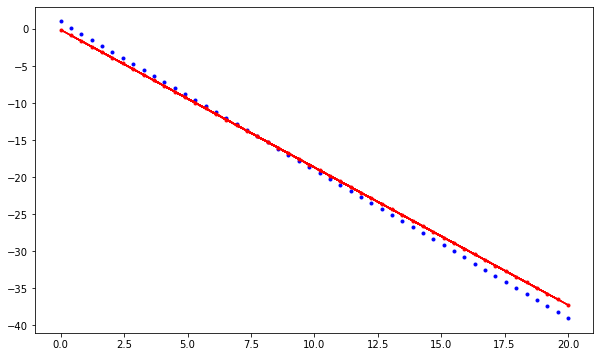

In [499]:
figure(figsize=(10, 6))
plt.plot(xn,yn,'.b',xn,(-0.12550879566108075 +(-1.8555302885714364*xn)),'.r-')

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [33]:
l = MB(xn,yn,.0005,300,20)

****************** Epoch 0 ********************

cost:51169.30285264956

Gradient Vector:[[ 13.38048661]
 [145.16038379]]

Gradient Vector Norm:145.77576768147497

theta_0_new :-0.01649636575598393, theta_1_new :-0.21698981288738325
****************** Epoch 1 ********************

cost:40108.52745903226

Gradient Vector:[[ 11.80883816]
 [128.49549049]]

Gradient Vector Norm:129.0369704192171

theta_0_new :-0.031080497311063795, theta_1_new :-0.4093353831289773
****************** Epoch 2 ********************

cost:31430.63747327243

Gradient Vector:[[ 10.41572408]
 [113.72356706]]

Gradient Vector Norm:114.19954909744551

theta_0_new :-0.04396961126207909, theta_1_new :-0.5798359790359232
****************** Epoch 3 ********************

cost:24623.58053714384

Gradient Vector:[[  9.18086517]
 [100.62959645]]

Gradient Vector Norm:101.04753320408886

theta_0_new :-0.055356251189086464, theta_1_new :-0.7309729080196973
****************** Epoch 4 ********************

cost:19285.1898237048

In [34]:
r2_score(yn,(-0.12597658250148622 +-1.9111727382304875*xn))

0.9976202741607925

Text(0, 0.5, 'loss')

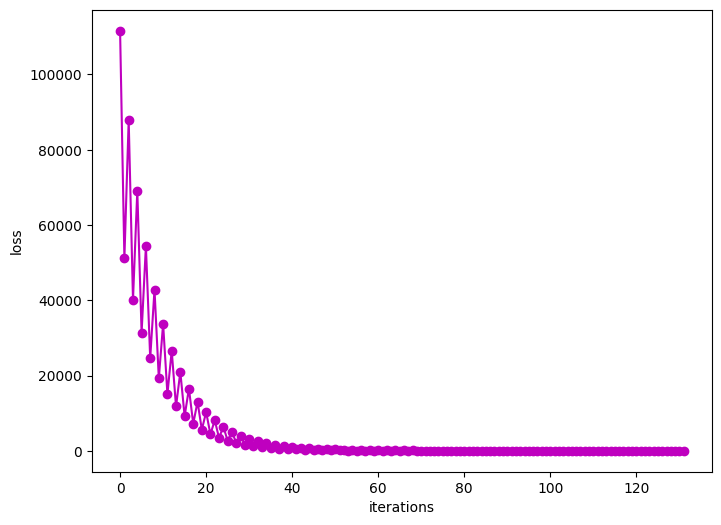

In [37]:
figure(figsize=(8, 6))
plt.plot(l[-1],'-mo')
plt.xlabel('iterations')
plt.ylabel('loss')



Text(0, 0.5, 'loss')

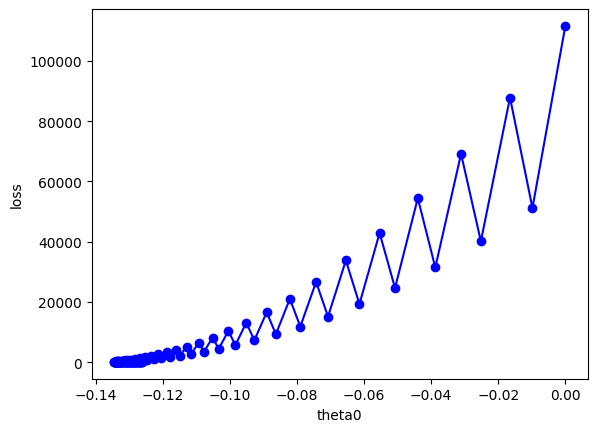

In [35]:
plt.plot(l[0][:-1],l[-1],'-bo')
plt.xlabel('theta0')
plt.ylabel('loss')



Text(0, 0.5, 'loss')

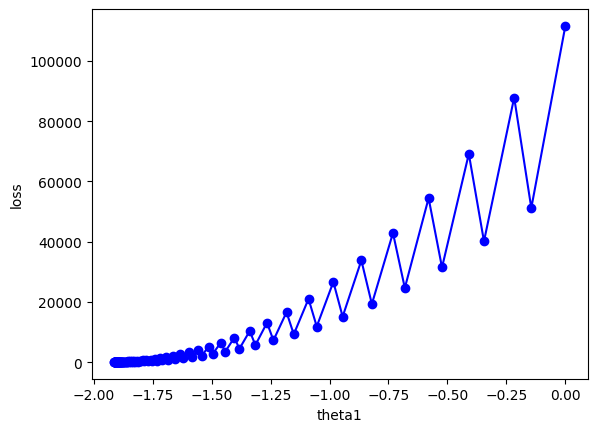

In [36]:
plt.plot(l[1][:-1],l[-1],'-bo')
plt.xlabel('theta1')
plt.ylabel('loss')



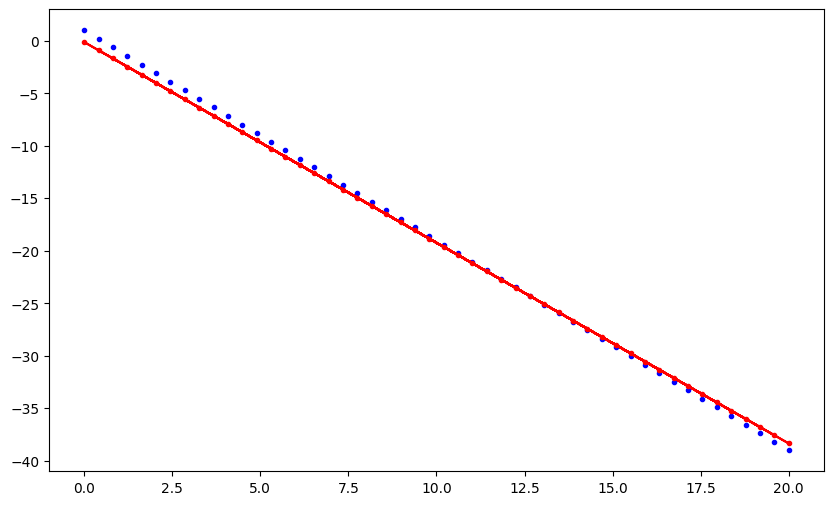

In [38]:
figure(figsize=(10, 6))
plt.plot(xn,yn,'.b',xn,(-0.12597658250148622 +-1.9111727382304875*xn),'.r-')